# 🚢Крушение пассажирского лайнера Титаник🚢

# Вступление 💻🚢

<b>Данная работа посвящена исследованию крушения Титаника, а именно данных о пассажирах того лайнера. Наша исследовательская работа будет состоять из двух частей. В первой мы посмотрим на данные, попытаемся выявить какие-либо закономерности. Во второй же части с помощью моделей машинного обучения научимся предсказывать по различным признакам выжил ли пассажир в той катастрофе или нет. Итак, сформулируем цель проекта.</b>

<b>🎯Цель:</b> Необходимо научиться предсказывать по входным данным факт выживаемости пассажира в крушении Титаника.

<b>📑Описание данных:</b>
1. PassengerId - ID пассажира;
2. Survived - выжил ли пассажир или нет (0=нет, 1=да);
3. Pclass - класс билета;
4. Name - имя пассажира;
5. Sex - пол пассажира;
6. Age - возраст пассажира;
7. SibSp - количество братьев и сестёр/супругов на борту Титаника;
8. Parch - количество родителей/детей на борту Титаника;
9. Ticket - идентификатор билета;
10. Fare - затраты пассажира;
11. Cabin - номер каюты;
12. Embarked - порт посадки (C = Шербур, Q = Квинстаун, S = Саутгемптон).

<b>В этой тетрадке будет приведен исследовательский анализ данных, по ходу которого углубимся в исходный набор данных. Обучение моделей машинного обучения будет представлено в следующей части. Собираемся с силами и начинаем😜</b>


# 🔎Исследовательский анализ данных🔎

## 📜1. Знакомство с данными󠁒󠁒📜

In [28]:
# Импорт необходимых библиотек

# Обработка данных
import pandas as pd

# Визуализация
import matplotlib.pyplot as plt
import seaborn as sns

# Статистический тест
from scipy.stats import ttest_ind

# Корреляция признаков
import phik
from phik.report import plot_correlation_matrix

In [29]:
# Загрузка данных
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [30]:
# Отображение основной информации о наборе данных
print(' ---------------------------------')
print('|    Тренировочный набор данных   |')
print(' ---------------------------------')
display(train.head())
print()
print(train.info())
print()
print('Размерность выборки:', train.shape)
print(' ---------------------------------')
print('|      Тестовый набор данных     |')
print(' ---------------------------------')
display(test.head())
print()
print(test.info())
print()
print('Размерность выборки:', test.shape)

 ---------------------------------
|    Тренировочный набор данных   |
 ---------------------------------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Размерность выборки: (891, 12)
 ---------------------------------
|      Тестовый набор данных     |
 ---------------------------------


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None

Размерность выборки: (418, 11)


**💬Промежуточные выводы.** Данные состоят из двух выборок: тренировочной и тестовой. Тренировочная состоит из 891 записи, а тестовая - из 418. В обеих выборках есть пропуски сразу в нескольких признаках

In [31]:
# Информация о пропусках в данных
def miss_values(data):
  # Соотношение пропусков разных признаках
  plt.figure(figsize=(8,6))
  sns.heatmap(data.isnull())
  plt.show()
  # Процент пропусков по каждому признаку
  return pd.DataFrame(round(data.isna().mean() * 100, 2), index=data.columns, columns=['Процент пропусков']).style.background_gradient()

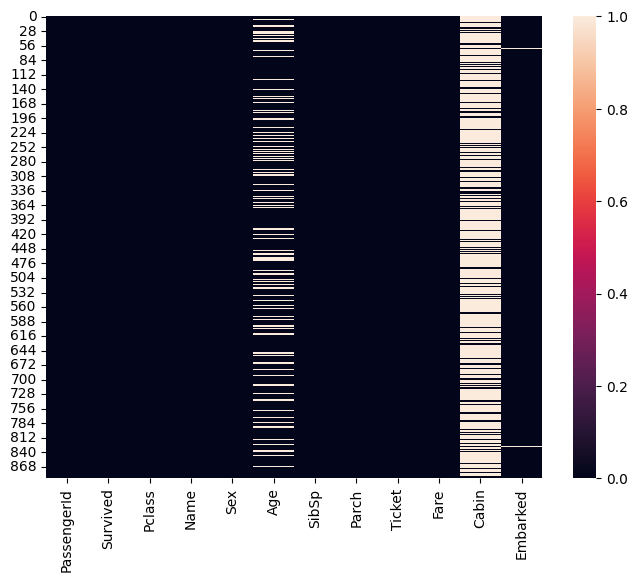

,Процент пропусков
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.870000
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [32]:
miss_values(train)

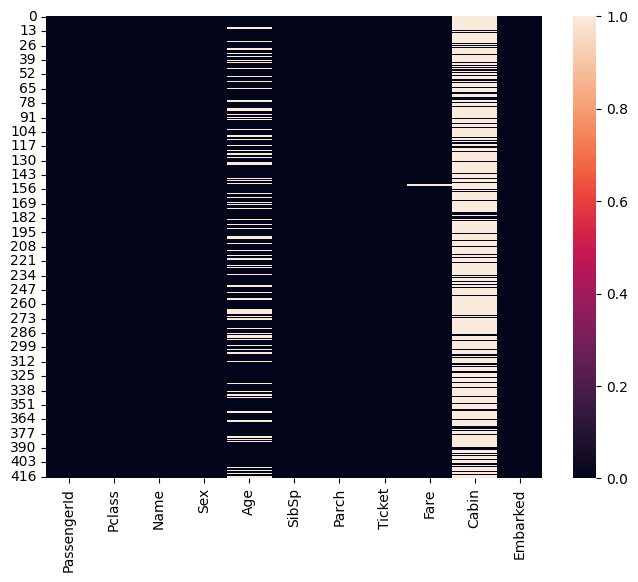

,Процент пропусков
PassengerId,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,20.570000
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.240000
Cabin,78.230000


In [33]:
miss_values(test)

**💬Промежуточные выводы.** Пропуски в данных есть и в тренировочном и в тестовом наборах данных. В первом пропуски присутствуют в признаках **Age** (19.9%), **Cabin** (77%), **Embarked** (0.2%). Во втором проупски коснулись **Age** (20.6%), **Fare** (0.2%), **Cabin** (78.2%).

## 📊2. Исследование признаков📊

### 2.1 Survived

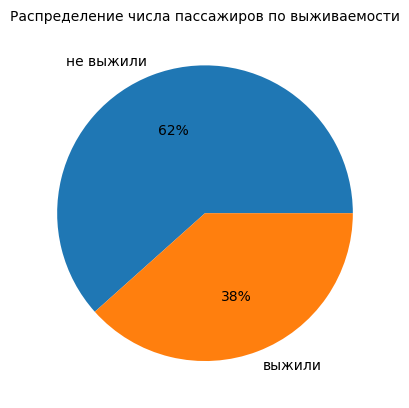

In [34]:
# Распределение признака Survived
plt.pie(train['Survived'].value_counts(), labels=['не выжили', 'выжили'], autopct='%.0f%%')
plt.title('Распределение числа пассажиров по выживаемости', fontdict = {'fontsize' : 10})
plt.show()

<div style="border-radius: 10px; border: #fa9c1b solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b> 🌟 Survived 🌟</b>
    <br>
    <dl>
        <dt><b>Описание 📝:</b></dt>
        <dd>Факт выживаемости пассажира при крушении Титаника.
        </dd>
        <dt><b>Пропущенные значения 🤷‍♂️:</b></dt>
        <dd> Нет. <dd>
        <dt><b>Комментарии 💬:</b></dt>
            ➤ Данные признак является целевым, т.е. тем, который нам необходимо научиться предсказывать.<br>
            ➤ Бинарный признак (0-пассажир не выжил, 1-выжил)<br>
            ➤ Заметен дисбаланс классов, 62% пассажиров из тренировочной выборки не выжили, 38% выжили.<br>
        </dd>
    </dl>
</div>

### 2.2 PassangedId

In [35]:
# Информация о признаке PassangedId
print(f'Количество уникальных значений:{len(train.PassengerId.unique())} ({len(train.PassengerId.unique()) / len(train.PassengerId) * 100}%)')

Количество уникальных значений:891 (100.0%)


<div style="border-radius: 10px; border: #fa9c1b solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b> 🌟 PassangerId 🌟</b>
    <br>
    <dl>
        <dt><b>Описание 📝:</b></dt>
        <dd>Уникальный идентификатор пассажира.
        </dd>
        <dt><b>Пропущенные значения 🤷‍♂️:</b></dt>
        <dd> Нет. <dd>
        <dt><b>Комментарии 💬:</b></dt>
            ➤ Этот признак не дает полезной информации о пассажире.<br>
            ➤ Необходимо в дальнейшем удалить из данных для корректной работы моделей.<br>
        </dd>
    </dl>
</div>

### 2.3 Pclass

In [36]:
# Функция для отображения распределения категориальных признаков на тренировочной
#  и тестовой выборках, а также его влиение на целевой признак
def distr(feature):
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
  sns.countplot(train, x=feature, ax=ax1)
  ax1.set(title='Распределение на тренировочной выборке')
  sns.countplot(test, x=feature, ax=ax2)
  ax2.set(title='Распределение на тестовой выборке')
  sns.countplot(data=train, x=feature, hue='Survived', ax=ax3)
  ax3.set(title='Влияние на признак Survived')
  plt.show()

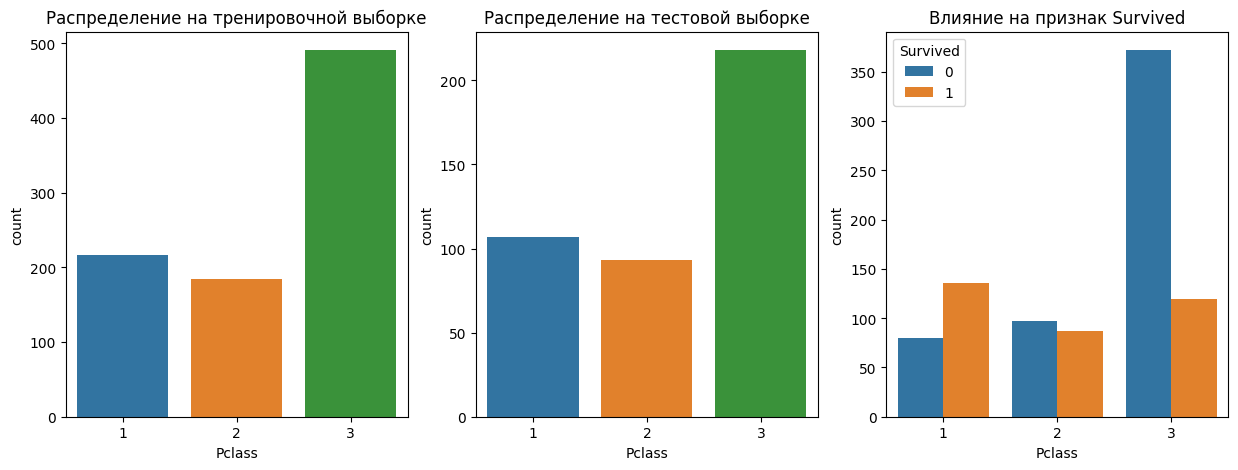

In [37]:
distr('Pclass')

<div style="border-radius: 10px; border: #fa9c1b solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b> 🌟 Pclass 🌟</b>
    <br>
    <dl>
        <dt><b>Описание 📝:</b></dt>
        <dd>Класс билета пассажира.
        </dd>
        <dt><b>Пропущенные значения 🤷‍♂️:</b></dt>
        <dd> Нет. <dd>
        <dt><b>Комментарии 💬:</b></dt>
            ➤ Категориальный признак со значениями 1, 2, 3, где каждая цифра обозначает класс билета пассажира.<br>
            ➤ Распределение на тренировочной и тестовой выборках схожи.<br>
            ➤ Большая часть пассажиров путешествовала 3-им классом, при этом выживамость у этих пассажиров самая низкая, по сравнению с другими классами.<br>
            ➤ Количество билетов 1 и 2 классов примерно одинаковые.<br>
            ➤ Выживаемость у пассажиров 2-го класса примерно 50 на 50, а вот среди пассажиров класса 1 выживших больше.<br>
        </dd>
    </dl>
</div>

### 2.4 Name

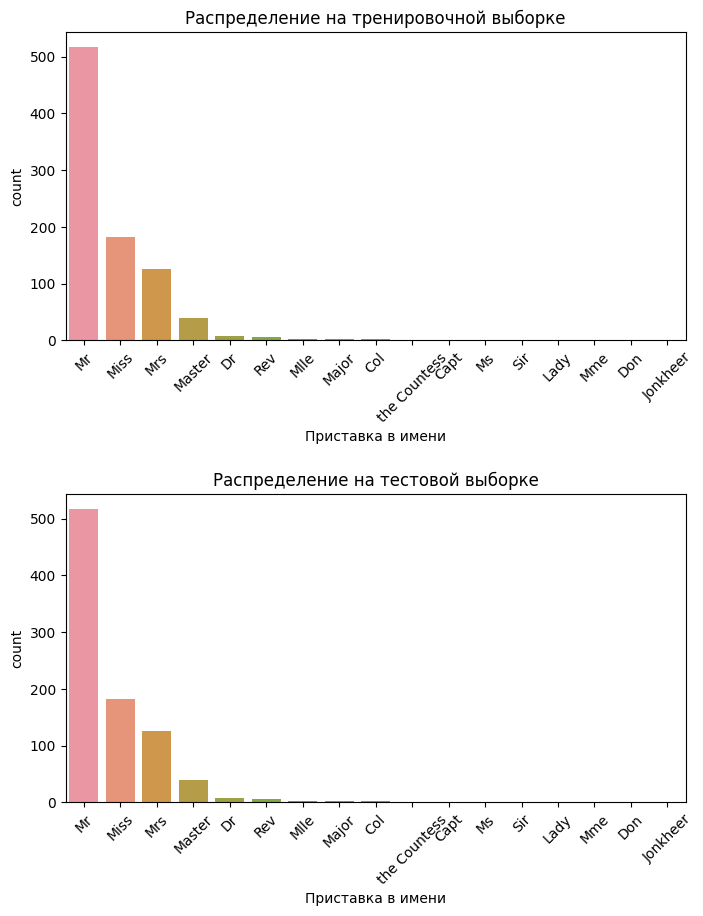

In [38]:
# Сам по себе признак Name бесполезен
# Но из этого признака можно вытянуть важную информацию
# Например, у кажого пассажира есть дополнения к их именам (Mr, Miss и т.д.)
name_train = train['Name'].map(lambda n: n.split('.')[0].split(', ')[-1])
name_test = train['Name'].map(lambda n: n.split('.')[0].split(', ')[-1])

# Отображение количества различных титулов у пассажиров
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,10))
fig.subplots_adjust(hspace=0.5)

sns.countplot(x=name_train, order=name_train.value_counts().index, ax=ax1)
ax1.set(title='Распределение на тренировочной выборке', xlabel='Приставка в имени')
ax1.tick_params(axis='x', rotation=45)

sns.countplot(x=name_test, order=name_test.value_counts().index, ax=ax2)
ax2.set(title='Распределение на тестовой выборке', xlabel='Приставка в имени')
ax2.tick_params(axis='x', rotation=45)

plt.show()

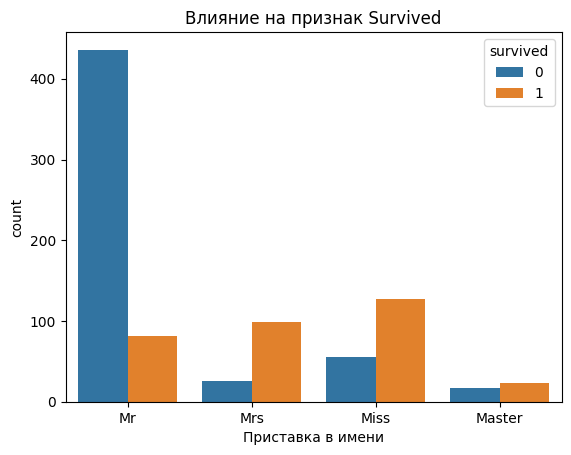

In [39]:
# Будем считать, что приставками Mr, Miss, Mrs и Master данные исчерпываются
name = pd.DataFrame(data={'name':name_train, 'survived':train['Survived']})
name = name.query('name in ("Mr", "Miss", "Mrs", "Master")').reset_index(drop=True)

hist = sns.countplot(data=name, x='name', hue='survived')
hist.set(title='Влияние на признак Survived', xlabel='Приставка в имени')
plt.show()

**💬Промежуточные выводы.** Примерно 97% всех пассажиров имели в своем имени приставки **Mr**, **Mr**, **Miss** или **Master**. Большинство пассажиров имели приставку **Mr**, а вот выживаемость у этой группы пассажиров очень маленькая, в отличие от остальных групп, где выживших больше тех, кто не смог спастись.

💡❓А вдруг приставка в имени поможет справиться с пропусками в признаке **Age**?💡❓

🎓Для этого необходимо исследовать среднее значения возраста в каждой категории🎓

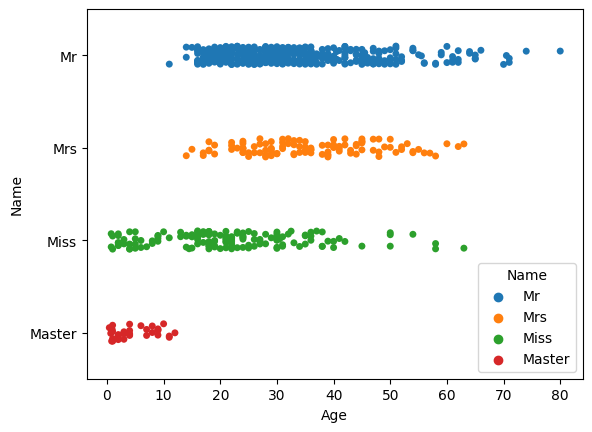

In [40]:
# Смотрим распределение возрастов для каждой категории пассажиров
name_age = pd.DataFrame(data={'Name':name_train, 'Survived':train['Survived']})
name_age['Age'] = train['Age']
name_age = name_age.query('Name in ("Mr", "Miss", "Mrs", "Master")').reset_index(drop=True)
sns.stripplot(data=name_age, x="Age", y="Name", hue='Name')
plt.show()

In [41]:
# Можно увидеть, что явно можно выделить по возрасту группы Master и Miss
# Mr и Mrs сложно графически различить
# Для проверки гипотез о неравенстве средних значений возраста этих групп
# используем статистический метод, а именно t-тест, сформулируем гипотезы
# H0: средние двух групп равны
# H1: средние различаются
results = ttest_ind(name_age.query('Name=="Mr"')['Age'],
                    name_age.query('Name=="Mrs"')['Age'],
                    equal_var=False, nan_policy='omit')
alpha = .01 # уровень значимости
if results.pvalue < alpha:
  print(f'Значение p-value: {results.pvalue}')
  print('Отвергаем нулевую гипотезу о равенстве средних')
else:
  print(f'Значение p-value: {results.pvalue}')
  print('Не получилось отвергнуть нулевую гипотезу')


Значение p-value: 0.006056253668281819
Отвергаем нулевую гипотезу о равенстве средних


<div style="border-radius: 10px; border: #fa9c1b solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b> 🌟 Name 🌟</b>
    <br>
    <dl>
        <dt><b>Описание 📝:</b></dt>
        <dd>Имя пассажира.
        </dd>
        <dt><b>Пропущенные значения 🤷‍♂️:</b></dt>
        <dd> Нет. <dd>
        <dt><b>Комментарии 💬:</b></dt>
            ➤ Признак является некоторым идентификатором пассажира, а именно отображет его имя.<br>
            ➤ Сам по себе признак неинформативен для задачи предсказания выживаемости пассажира, но из данного признака можно получить полезную информацию.<br>
            ➤ Получилось выделить 4 группы пассажиров по приставке в их имени (Mr, Mrs, Miss, Master). Эти группы составляют примерно 97% всех данных.<br>
            ➤ Выживаемость у группы Mr очень низкая, в отличие от других групп, где выживших больше, чем погибших.<br>
            ➤ Основываясь на графическом отображении распределений возрастов каждой из групп и на проведенном статистическом тесте, можно предположить, что пропуски в столбце **Age** можно заполнить с помощью рассматриваемого признака (взять среднее значение по каждой из групп).<br>
        </dd>
    </dl>
</div>

### 2.5 Sex

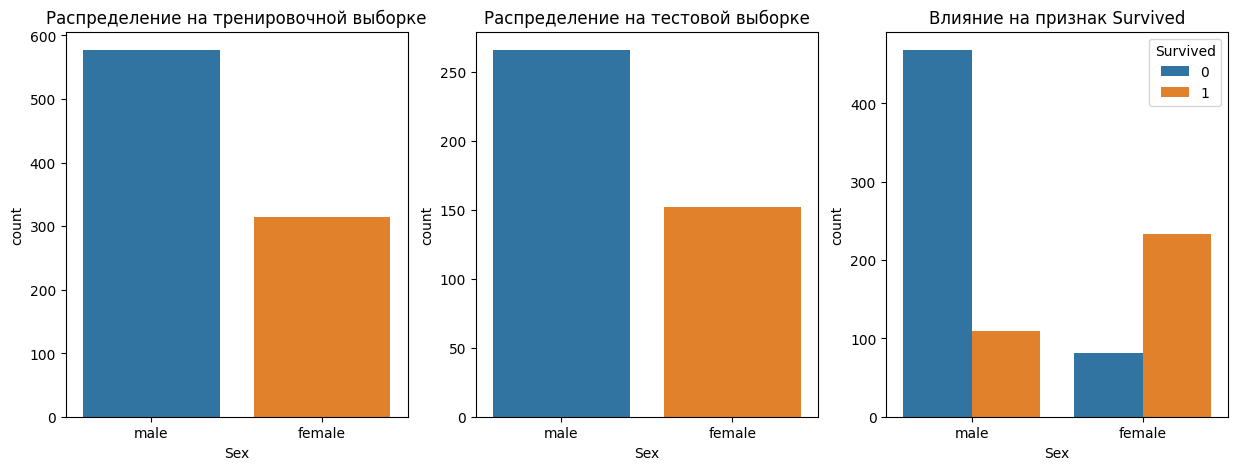

In [42]:
distr('Sex')

<div style="border-radius: 10px; border: #fa9c1b solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b> 🌟 Sex 🌟</b>
    <br>
    <dl>
        <dt><b>Описание 📝:</b></dt>
        <dd>Пол пассажира.
        </dd>
        <dt><b>Пропущенные значения 🤷‍♂️:</b></dt>
        <dd> Нет. <dd>
        <dt><b>Комментарии 💬:</b></dt>
            ➤ Категориальный признак, обозначающий пол пассажира (male, female).<br>
            ➤ Распределение на тренировочной и тестовых выборках одинаковое (мужчин на борту Титаника было почти в 2 раза больше, чем женщин).<br>
            ➤ Выживаемость у мужчин в этой катастрофе очень низкая. У женщин наоборот - выживших в 2 раза больше, чем погибших.<br>
        </dd>
    </dl>
</div>

### 2.6 Age

In [43]:
# Подсчет основных статистик
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

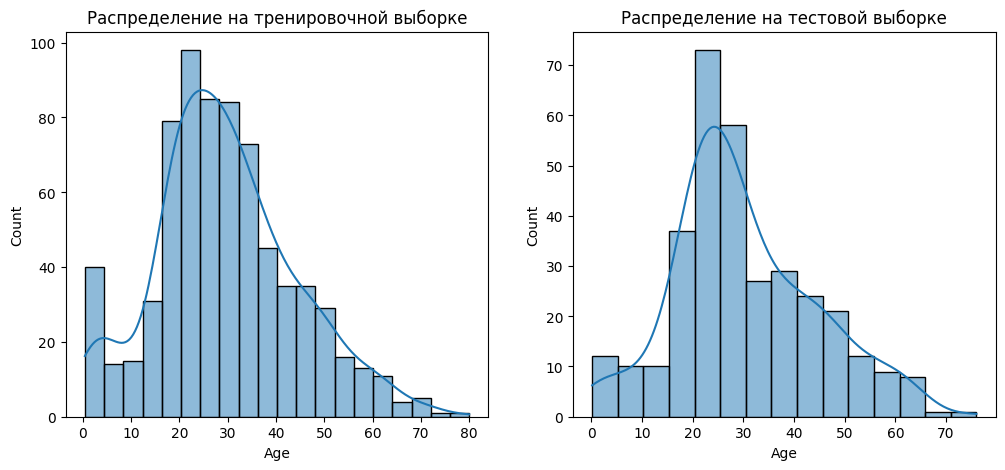

In [44]:
# Распределение признака
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(data=train, x='Age', kde=True, ax=ax1)
ax1.set(title='Распределение на тренировочной выборке')
sns.histplot(data=test, x='Age', kde=True, ax=ax2)
ax2.set(title='Распределение на тестовой выборке')
plt.show()

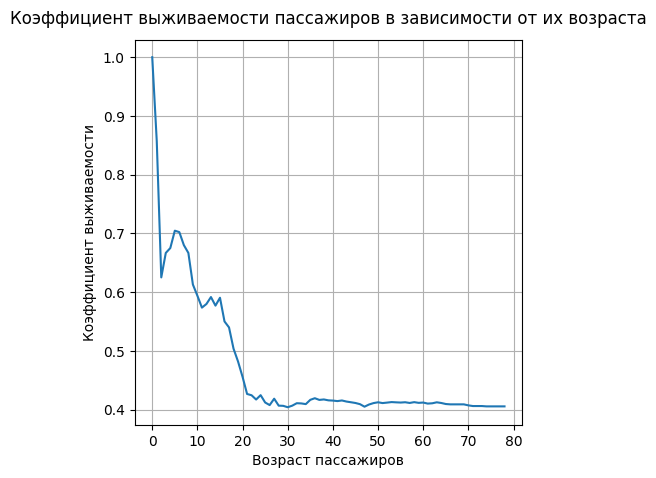

In [45]:
# Построение графика коэффициента выживаемости в зависимости от возраста
sur_ratio = []
for i in range(1, 80):
    sur_ratio.append(train[train['Age'] < i]['Survived'].sum() / len(train[train['Age'] < i]['Survived']))

plt.figure(figsize=(5,5))
plt.plot(sur_ratio)
plt.title('Коэффициент выживаемости пассажиров в зависимости от их возраста', y=1.02)
plt.ylabel('Коэффициент выживаемости')
plt.xlabel('Возраст пассажиров')
plt.grid(visible=True)
plt.show()

<div style="border-radius: 10px; border: #fa9c1b solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b> 🌟 Age 🌟</b>
    <br>
    <dl>
        <dt><b>Описание 📝:</b></dt>
        <dd>Возраст пассажира.
        </dd>
        <dt><b>Пропущенные значения 🤷‍♂️:</b></dt>
        <dd> 19.87% пропусков в тренировочной выборке и 20.57% в тестовой. <dd>
        <dt><b>Комментарии 💬:</b></dt>
            ➤ Числовой признак, указывающий на возраст пассажира.<br>
            ➤ Имеет близкое к нормальному распределение, которое схоже и на тренировочной, и на тестовой выборках. Лежит в пределах от 0 до 80.<br>
            ➤ Коэффициент выживаемости у самых маленьких пассажиров выше 0.6, от 10 до 15 лет коэффициент находится на уровне примерно 0.58, затем резко падает и устанавливается в значение 0.4 после 20 лет.<br>
        </dd>
    </dl>
</div>

### 2.7 SibSp

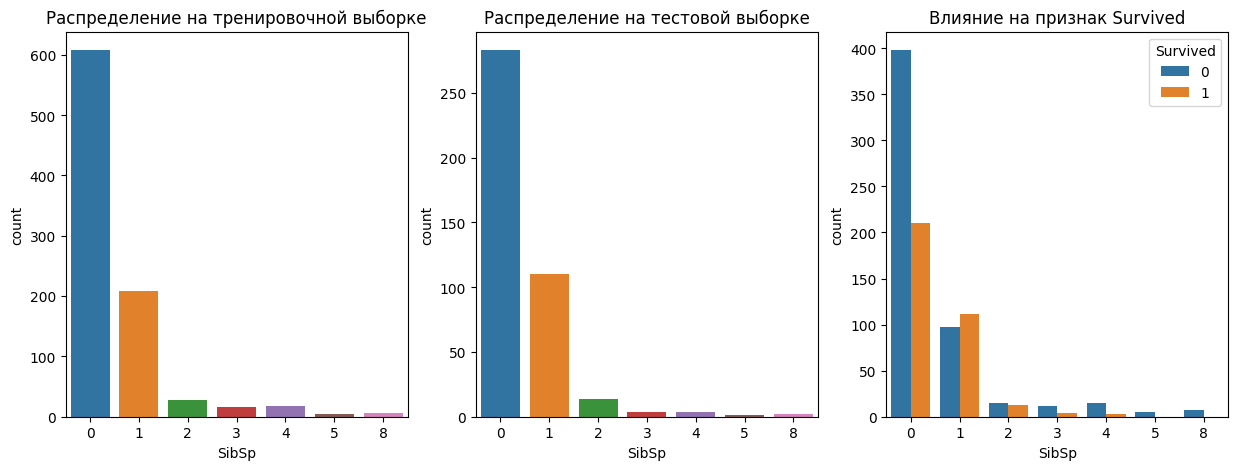

In [46]:
distr('SibSp')

<div style="border-radius: 10px; border: #fa9c1b solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b> 🌟 SibSp 🌟</b>
    <br>
    <dl>
        <dt><b>Описание 📝:</b></dt>
        <dd>Количество братьев и сестёр/супругов пассажиров на борту Титаника.
        </dd>
        <dt><b>Пропущенные значения 🤷‍♂️:</b></dt>
        <dd> Нет. <dd>
        <dt><b>Комментарии 💬:</b></dt>
            ➤ Данный признак имеет тип int, но будем его рассматривать как категориальный.<br>
            ➤ У большинства пассажиров 1 или вовсе нет родственников из категории "братья и сестры/супруги".<br>
            ➤ У пассажиров, у которых не было родных из вышеописанной категории, выживаемость находится на уровне 1 выживший на 2 невыживших, а у тех, у кого был 1 родственник на борту, выживаемость примерно 50% с небольшим перевесом выживших.<br>
        </dd>
    </dl>
</div>

### 2.8 Parch

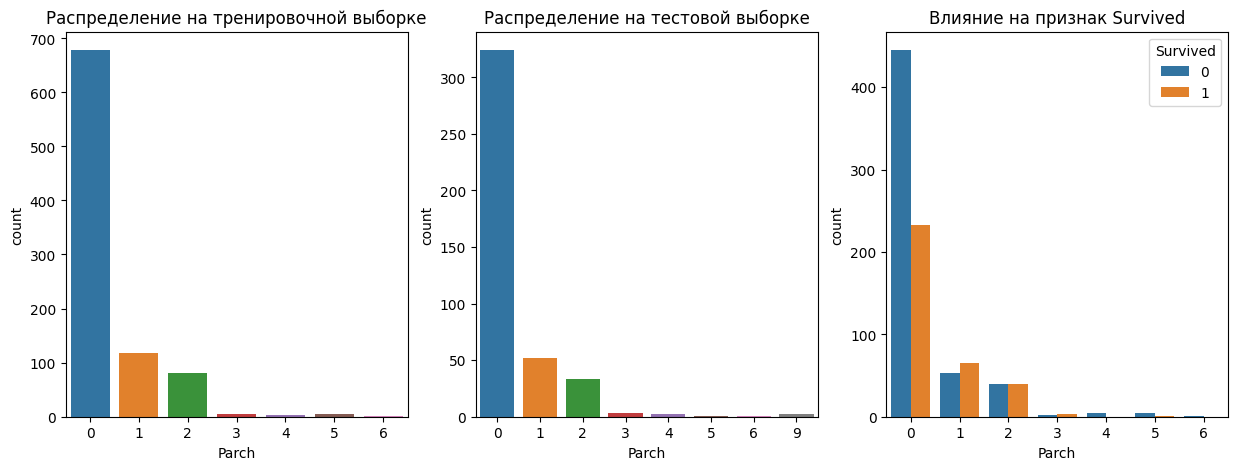

In [47]:
distr('Parch')

<div style="border-radius: 10px; border: #fa9c1b solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b> 🌟 Parch 🌟</b>
    <br>
    <dl>
        <dt><b>Описание 📝:</b></dt>
        <dd>Количество родителей/детей на борту Титаника.
        </dd>
        <dt><b>Пропущенные значения 🤷‍♂️:</b></dt>
        <dd> Нет. <dd>
        <dt><b>Комментарии 💬:</b></dt>
            ➤ Данный признак имеет тип int, но будем его рассматривать как категориальный.<br>
            ➤ У большинства пассажиров 1, 2 или вовсе нет родственников из категории "родители/дети".<br>
            ➤ У пассажиров, у которых не было родных из вышеописанной категории, выживаемость находится на уровне 1 выживший на 2 невыживших, а у тех, у кого был 1 или 2 родственника на борту, выживаемость примерно 50% с небольшим перевесом выживших. Схожая ситуация была и в признаке SibSp, т.е. можно предположить, что эти два признака достаточно сильно будут влиять на целевой. В теории сложив значения этих двух признаков мы получим признак по типу "Общее количество родственников на борту"<br>
        </dd>
    </dl>
</div>

### 2.9 Ticket

<div style="border-radius: 10px; border: #fa9c1b solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b> 🌟 Ticket 🌟</b>
    <br>
    <dl>
        <dt><b>Описание 📝:</b></dt>
        <dd>Идентификатор билета.
        </dd>
        <dt><b>Пропущенные значения 🤷‍♂️:</b></dt>
        <dd> Нет. <dd>
        <dt><b>Комментарии 💬:</b></dt>
            ➤ Данный признак является категориальным и обозначает идентификатор билета, по которому путешествовали пассажиры.<br>
            ➤ Признак не является информативным в задаче предсказания выживаемости пассажира.<br>
        </dd>
    </dl>
</div>

### 2.10 Fare

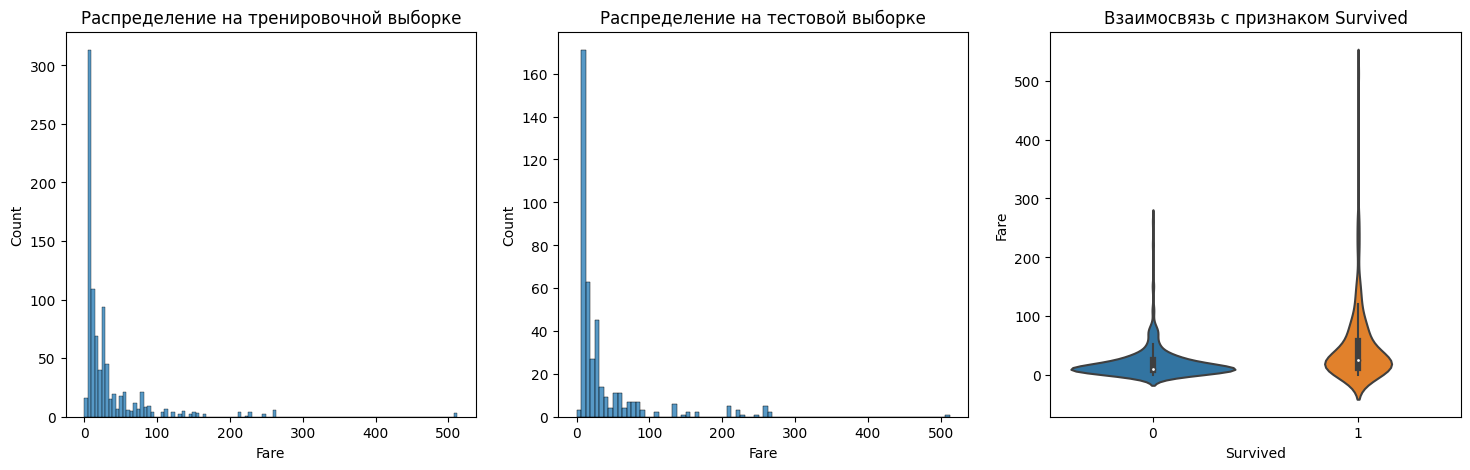

In [48]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(data=train, x='Fare', ax=ax1)
ax1.set(title='Распределение на тренировочной выборке')
sns.histplot(data=test, x='Fare', ax=ax2)
ax2.set(title='Распределение на тестовой выборке')
sns.violinplot(data=train, x='Survived', y='Fare', ax=ax3)
ax3.set(title='Взаимосвязь с признаком Survived')
plt.show()

<div style="border-radius: 10px; border: #fa9c1b solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b> 🌟 Fare 🌟</b>
    <br>
    <dl>
        <dt><b>Описание 📝:</b></dt>
        <dd>Затраты пассажира.
        </dd>
        <dt><b>Пропущенные значения 🤷‍♂️:</b></dt>
        <dd> 0.24% пропусков в тестовом наборе данных. <dd>
        <dt><b>Комментарии 💬:</b></dt>
            ➤ Данный признак является числовым и обозначает затраты пассажира.<br>
            ➤ Данный признак одинаково распределен на тренировочной и тестовой выборках.<br>
            ➤ Большинство значений лежит в диапазоне от 0 до 100.<br>
            ➤ Распределение затрат у тех, кто выжил, более вытянутое, чем у тех, кто не выжил (у них распределение сконцентрировано около 0).<br>
        </dd>
    </dl>
</div>

### 2.11 Cabin

<div style="border-radius: 10px; border: #fa9c1b solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b> 🌟 Cabin 🌟</b>
    <br>
    <dl>
        <dt><b>Описание 📝:</b></dt>
        <dd>Номер каюты.
        </dd>
        <dt><b>Пропущенные значения 🤷‍♂️:</b></dt>
        <dd> 77.1% пропусков в тренировочной и 78.2% в тестовой выборках <dd>
        <dt><b>Комментарии 💬:</b></dt>
            ➤ Данный признак обозначает номер каюты, в которой числился пассажир.<br>
            ➤ Признак имеет слишком много пропусков, чтобы он был полность восстановлен, значит он не особо информативен в задаче предсказывания выживаемости пассажиров.<br>
        </dd>
    </dl>
</div>

### 2.12 Embarked

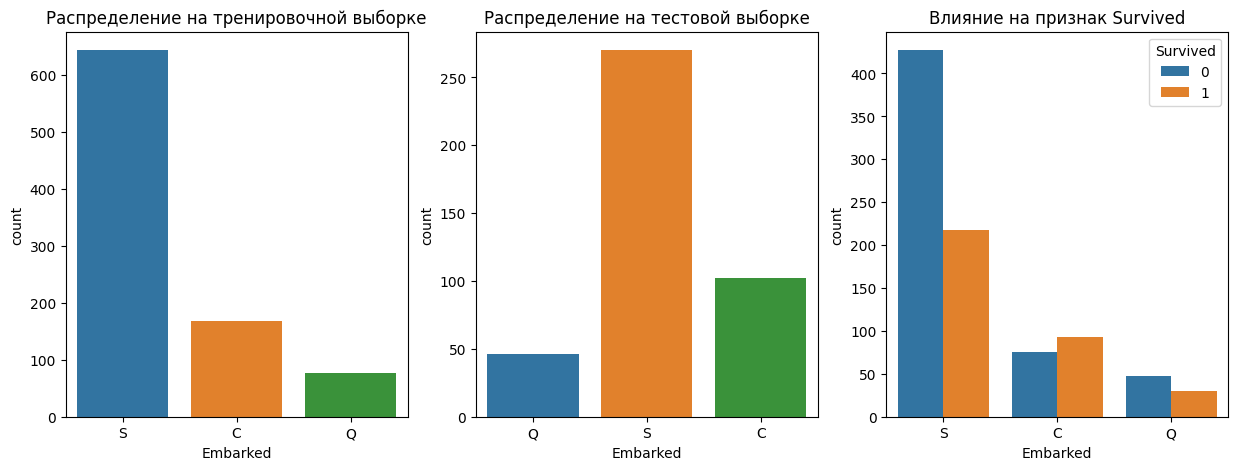

In [49]:
distr('Embarked')

<div style="border-radius: 10px; border: #fa9c1b solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b> 🌟 Embarked 🌟</b>
    <br>
    <dl>
        <dt><b>Описание 📝:</b></dt>
        <dd>Порт посадки.
        </dd>
        <dt><b>Пропущенные значения 🤷‍♂️:</b></dt>
        <dd> 0.22% пропусков в тренировочной выборке <dd>
        <dt><b>Комментарии 💬:</b></dt>
            ➤ Данный признак обозначает порт отправки пассажира (C = Шербур, Q = Квинстаун, S = Саутгемптон).<br>
            ➤ Данные распределены примерно одинаково на тренировочной и тестовой выборках. Большинство пассажиров отправились в путешествие на Титанике из Саутгемптона. Намного меньше из Шербура и Квинстауна.<br>
            ➤ Выживаемость среди тех, кто отправился из Саутгемптона на уровне 1 выживший на 2 невыживших. Чуть больше 50% выживаемость у тех, кто отправился из Шербура. Число невыживших больше среди тех, кто отправился из Квинстауна чем тех, кто выжил.<br>
    </dl>
</div>

### 2.13 Корреляция признаков

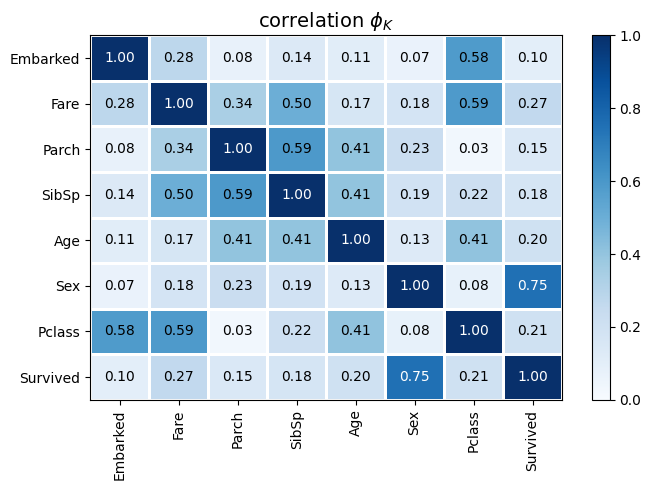

In [50]:
# Теперь посмотрим на корреляцию между признаками, но при этом не будем учитывать
# неинформативыне признаки
phik_overview = train.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1).phik_matrix(interval_cols=['Age', 'Fare'])
plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index,
                        vmin=0, vmax=1, color_map='Blues', title=r'correlation $\phi_K$')
plt.tight_layout()

**💬Промежуточные выводы.** Первым, что бросается в глаза, это зависимость между целевой переменно и полом пассажира. Эта зависимость достаточно сильная. Также видна небольшая зависимость между признаком **Pclass** и признаками **Fare** и **Embarked**, что кажется достаточно логичным, ведь затраты пассажира зависят от того, каким классом они путешествовали, а в каждом из портов могли продавать билеты преимущественно одного класса. Также видна некоторая зависимость у признаков **Parch** и **SibSp**, т.к. они показывают количество различных родственников у пассажиров.  

# 📢3. Выводы📢

В ходе исследовательского анализа данных мы узнали некоторые особенности нашего набора данных. Вот некоторые из них.

**🧮Стуктура данных.🧮**

Данные состоят из двух выборок: тренировочной (891 объект) и тестовой (418 объектов). Признаки в данных совпадают за исключением одного (**Survived**), которого нет в тестовой выборке и который нам необходимо научиться предсказывать.

**🆘❌Ошибки в данных.❌🆘**

Главной ошибкой в данных являются пропуски сразу в нескольких признаках:
- Age (19.87% в тренировочной и 20.57% в тестовой выборках);
- Fare (0.24% в тестовой выборке);
- Cabin (77.1% в тренировочной и 78.23% в тестовой выборках);
- Embarked (0.22% в тренировочной выборке).

**🔜Ход дальнейшего исследования.🔜**

В следующей части работы будет произведено заполнение пропусков в данных, создание новых признаков, приведение данных к формату, пригодному для понимания моделями машинного обучения, отбор качественных признаков, подбор моделей для рассматриваемой задачи и наконец итоговое тестирование самой перспективной модели.